In [1]:
import numpy as np
import h5py

In [2]:
def load_dataset():
    train_dataset = h5py.File('F://data/deeplearning_2/datasets/train_catvnoncat.h5','r')
    train_set_x_orig = np.array(train_dataset['train_set_x'][:])
    train_set_y_orig = np.array(train_dataset['train_set_y'][:])
    
    test_dataset = h5py.File('F://data/deeplearning_2/datasets/test_catvnoncat.h5','r')
    test_set_x_orig = np.array(test_dataset['test_set_x'][:])
    test_set_y_orig = np.array(test_dataset['test_set_y'][:])
    
    classes = np.array(test_dataset['list_classes'][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))
    
    return train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig,classes

In [27]:
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes = load_dataset()

In [4]:
import matplotlib.pyplot as plt

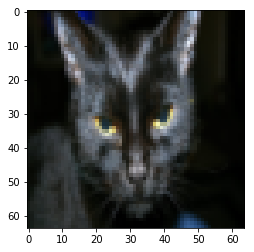

In [5]:
plt.imshow(train_set_x_orig[25])

In [28]:
print(train_set_y[0,25])

1


In [7]:
print(classes)

[b'non-cat' b'cat']


In [29]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]
num_px

64

In [9]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T    # 将图片数组降维

In [10]:
train_set_x_flatten.shape

(12288, 209)

In [30]:
train_set_x = train_set_x_flatten / 255     # 归一化
test_set_x = test_set_x_flatten / 255

In [12]:
def sigmoid(z):
    return 1 / (1 +np.exp(-z))

In [32]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim,1))
    b = 0
    return w,b

In [17]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X) + b)
    cost = (-1/m) * np.sum(Y*np.log(A) + (1 - Y)*(np.log(1-A)))
    
    dw = (1/m) * np.dot(X,(A - Y).T)
    db = (1/m) *np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {
        'dw':dw,
        'db':db
    }
    
    return (grads,cost)

In [19]:
# 检验一下前向广播
w,b,X,Y = np.array([[1],[2]]) ,2,np.array([[1,2],[3,4]]),np.array([[1,0]])
grads,cost = propagate(w,b,X,Y)
print('dw = '+ str(grads['dw']))
print('db = '+ str(grads['db']))
print(cost)

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
6.000064773192205


In [21]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = prograte(w,b,X,Y)
        dw = grads['dw']
        db = grads['db']
        
        w  = w - learning_rate * dw
        b = b = learning_rate * db
        
        if i %100 == 0:
            costs.append(cost)
        
        if (print_cost) and (i %100 == 0):
            print('迭代的次数{}，误差值为：{}'.format(i,cost))
            
    
    params = {
        'w' : w,
        'b' :b
    }
    grads = {
        'dw':dw,
        'db':db
    }
    
    return (params,grads,costs)

In [22]:
# 测试optimize函数
w,b,X,Y = np.array([[1],[2]]) ,2,np.array([[1,2],[3,4]]),np.array([[1,0]])
params,grads,costs = optimize(w,b,X,Y,num_iterations=100,learning_rate=0.009,print_cost=False)

print('w = ' + str(params['w']))
print('b = ' + str(params['b']))
print('dw= ' + str(grads['dw']))
print('db= ' + str(grads['db']))

w = [[0.14702687]
 [0.31813621]]
b = 0.002676902751425007
dw= [[0.71547724]
 [1.31034452]]
db= 0.29743363904722303


In [23]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T,X) + b)
    for i in range(A.shape[1]):
        Y_prediction[0,i] = 1 if A[0,i] > 0.5 else 0
        
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [24]:
# 测试predict
w,b,X,Y = np.array([[1],[2]]) ,2,np.array([[1,2],[3,4]]),np.array([[1,0]])
print('predict = '+str(predict(w,b,X)))

predict = [[1. 1.]]


In [34]:
def model(X_train,Y_train,X_test,Y_test,num_iterations = 2000,learning_rate = 0.1,print_cost = False):
    w,b = initialize_with_zeros(X_train.shape[0])
    paramters,grads,costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    
    w,b = paramters['w'],paramters['b']
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    print('训练集准确性：{}'.format(100 - np.mean(np.abs(Y_prediction_train - Y_train) * 100)) + '%')
    print('测试集准确性：{}'.format(100 - np.mean(np.abs(Y_prediction_test - Y_test) * 100)) + '%')
    
    d = {
        'costs' : costs,
        'Y_prediction_test':Y_prediction_test,
        'Y_prediction_train':Y_prediction_train,
        'w':w,
        'b':b,
        'learning_rate':learning_rate,
        'num_iterations':num_iterations
    }
    
    return d

In [35]:
# 测试model
d = model(train_set_x,train_set_y,test_set_x,test_set_y,num_iterations=2000,learning_rate=0.005,print_cost=True)

迭代的次数0，误差值为：0.6931471805599453
迭代的次数100，误差值为：0.5837469055964836
迭代的次数200，误差值为：0.4661196209181713
迭代的次数300，误差值为：0.37546464291440496
迭代的次数400，误差值为：0.3315308259031981
迭代的次数500，误差值为：0.3033219663656161
迭代的次数600，误差值为：0.2799143119488366
迭代的次数700，误差值为：0.2600662739368431
迭代的次数800，误差值为：0.24295691367348057
迭代的次数900，误差值为：0.22801455569676407
迭代的次数1000，误差值为：0.21482546944644004
迭代的次数1100，误差值为：0.20308091800551767
迭代的次数1200，误差值为：0.19254464684891437
迭代的次数1300，误差值为：0.18303200886627333
迭代的次数1400，误差值为：0.1743960641752385
迭代的次数1500，误差值为：0.16651804035607828
迭代的次数1600，误差值为：0.1593006158213813
迭代的次数1700，误差值为：0.15266308558804736
迭代的次数1800，误差值为：0.1465378139365669
迭代的次数1900，误差值为：0.14086758596013874
训练集准确性：99.04306220095694%
测试集准确性：70.0%


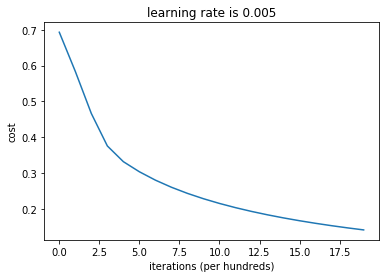

In [37]:
# 绘制图
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('learning rate is '+str(d['learning_rate']))
plt.show()

learning_rate is 0.01
训练集准确性：99.52153110047847%
测试集准确性：68.0%

-----------------------------------------

learning_rate is 0.001
训练集准确性：88.99521531100478%
测试集准确性：64.0%

-----------------------------------------

learning_rate is 0.005
训练集准确性：97.60765550239235%
测试集准确性：70.0%

-----------------------------------------



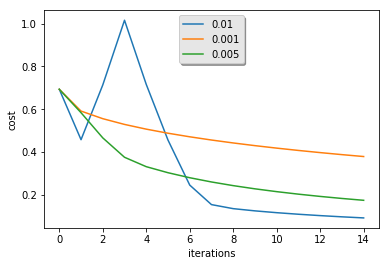

In [40]:
# 分析学习速率的影响
learning_rates = [0.01,0.001,0.005]
models = {}
for i in learning_rates:
    print('learning_rate is ' + str(i))
    models[str(i)] =  model(train_set_x,train_set_y,test_set_x,test_set_y,num_iterations=1500,learning_rate=i,print_cost=False)
    print('\n' + '-----------------------------------------'+'\n')
    
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]['costs']),label = str(models[str(i)]['learning_rate']))
    
plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc = 'upper center',shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()